In [142]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
df = pd.read_csv("pitt-with_wind.csv")

In [144]:
df.head(2)

,start_time,trip_id,stop_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,station_name,user_type,...,season,holiday,walk_score,transit_score,bike_score,distance,event_type,rain,wind,weather
0,2015-05-31 06:54:00,10676972,2015-05-31 10:17:00,70166,12190,1018,Butler St & Stanton Ave,1001,Forbes Ave & Market Square,Customer,...,spring,1,90.0,62.0,75.0,2.67,N,0.37,8.95,3.0
1,2015-05-31 06:57:00,10677086,2015-05-31 09:24:00,70368,8842,1018,Butler St & Stanton Ave,1018,Butler St & Stanton Ave,Subscriber,...,spring,1,90.0,62.0,75.0,0.00,N,0.37,8.95,3.0


In [145]:
#Variable to hold datetime values:
trips = df.copy()
i =  pd.to_datetime(trips.start_time)
#Transforming columns to split by date, hour or month
trips['date'] = i.dt.date
trips['hour'] = i.dt.hour
trips["month"] = i.dt.month

'The total number of trips made by each user category over the course of the time period from when the program went live on July 1st, 2015  to Dec 31st, 2018 are depicted in this chart'

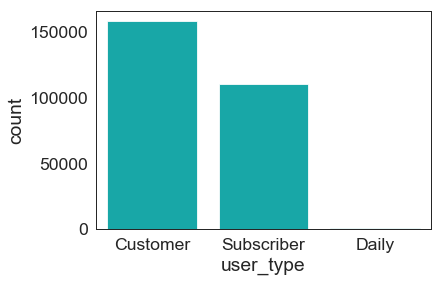

In [146]:
import seaborn as sns
#The total number of trips made by each user category over the course of the time period are depicted in the chart below:
trips.columns =trips.columns.str.replace(' ', '')    
sns.countplot(x = "user_type", data = trips
              , color = "c" );
"""The total number of trips made by each user category over the course of the time period from when the program went live on July 1st, 2015  to Dec 31st, 2018 are depicted in this chart"""

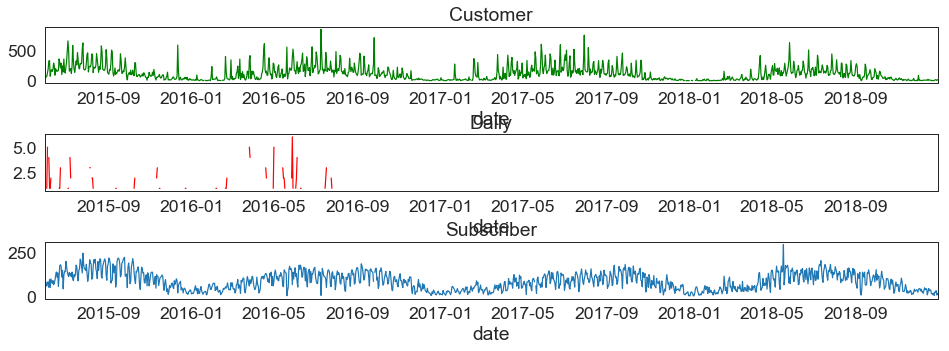

In [147]:
# Count trips by date

by_date = trips.pivot_table('trip_id', aggfunc='count', index = "date",columns='user_type' )
fig, ax = plt.subplots(3, figsize=(16, 5))
fig.subplots_adjust(hspace=0.9)
by_date.iloc[:, 0].plot(ax=ax[0],color = "green", title ="Customer");
by_date.iloc[:, 1].plot(ax=ax[1], color = "red",title ="Daily");
by_date.iloc[:, 2].plot(ax=ax[2],title ="Subscriber");

Compared to other user types such as Customer passes and Subscriber passes, Daily pass user type counts looks negligible. There is no corresponding category for daily passes on Healthy ride website as well. It can be concluded from the graph above that the daily passes was issued inconsistently from 2015,Quarter 2 to 2016, Quarter 2. Since there were only 186 instances out of total 267260 rider counts , it will be excluded from further analysis"



In [148]:
trips.drop(trips.loc[trips['user_type']=="Daily"].index, inplace=True)

Text(0.5, 1.0, 'Most popular stations')

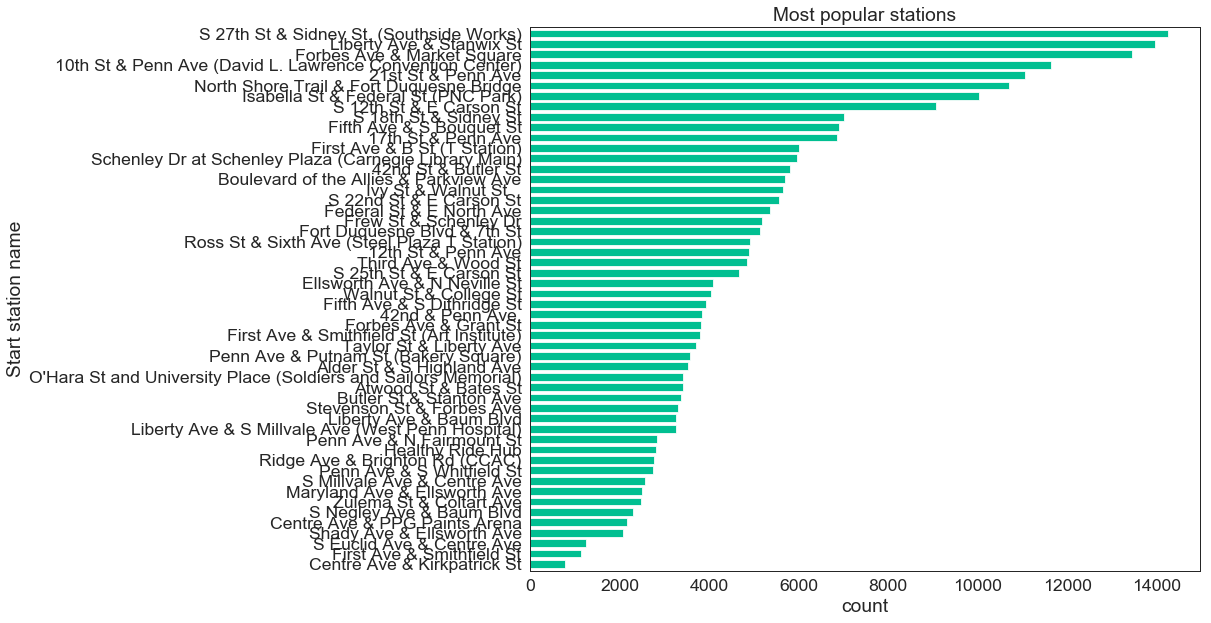

In [149]:
#visualize the popular start stations based on the number of trips taken
x = trips['from_station_name'].value_counts().sort_values()
x.plot(kind='barh',figsize=(12, 10), color='#01bf91',  width=0.75);
plt.xlabel("count")
plt.ylabel("Start station name")
plt.title("Most popular stations")

In [163]:
#create a copy of the data
b = trips.copy()

In [164]:
# convert trip duration into minutes
b["tr_du_mins"] = b['trip_duration'].div(60)

# converting trip duration into hours
b["tr_du_hr"] = b["tr_du_mins"].div(60)

# to calculate how fast does the rider rides the bike, i will be creating a new column "speed" which calculates the speed in miles per hour
b['speed'] = round(b['distance'] /b['tr_du_hr'], 2)

b['speed'].value_counts()


0.00     70771
0.05       556
0.06       547
0.04       536
0.07       535
0.12       515
0.10       513
0.03       509
0.09       495
0.15       494
0.08       493
0.02       479
0.11       475
0.13       467
0.14       463
0.17       420
0.16       412
5.14       406
0.21       403
0.20       389
0.19       386
0.18       380
0.25       370
0.32       352
5.41       352
0.22       340
0.23       340
5.18       339
0.28       339
0.30       339
         ...  
28.48        1
12.28        1
13.78        1
22.55        1
21.13        1
17.20        1
80.40        1
19.11        1
13.62        1
34.74        1
15.00        1
14.90        1
16.65        1
41.67        1
34.26        1
16.88        1
18.56        1
44.55        1
60.27        1
18.59        1
16.20        1
32.62        1
14.46        1
13.43        1
18.43        1
14.14        1
13.21        1
17.34        1
21.43        1
19.73        1
Name: speed, Length: 1815, dtype: int64

As we can see,  70771 zero values are recorded where start station and stop station are same and distance is 0.Professional bicycle racers can usually maintain 25-28 mph on flat ground. Let's plot a seaborn regplot to find outliers by plotting speed in miles/hour in y-axis and count in horizontal axis.

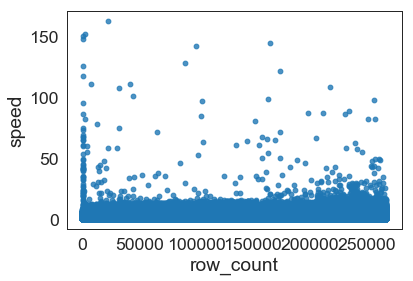

In [165]:
#Since Seaborn doesn't play nice with dates, I'll create a row count column that we can use as our y-axis\n",
b.insert(b.shape[1],'row_count',b.index.value_counts().sort_index().cumsum())
sns.regplot(x=b["row_count"], y=b["speed"], fit_reg=False);

In [166]:
b.drop(b.index[b['speed'] == 0], inplace = True)# for data visualization purposes
b.drop(b.index[b['speed'] >= 30], inplace = True)# Even professional bicycle racers can usually maintain 25-28 mph on flat ground
b.speed.describe()

count    196427.000000
mean          4.367137
std           2.666286
min           0.010000
25%           2.340000
50%           4.490000
75%           6.150000
max          29.880000
Name: speed, dtype: float64

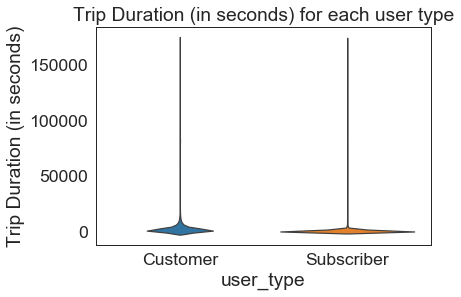

In [167]:
#Generate the violin plot of trip duration in seconds in y-axis and user types in horizontal axis
sns.violinplot(x='user_type', y='trip_duration', data=b, inner = None)
_= plt.title("Trip Duration (in seconds) for each user type")
_=plt.ylabel("Trip Duration (in seconds)")
# Display the plot

The violin plot of trip duration in seconds for each user type has a lot of anomalies. I will generate a box plot of user_type using the trip duration into minutes

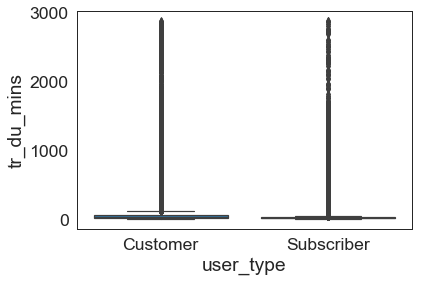

In [168]:
sns.boxplot(x='user_type', y="tr_du_mins", data=b);

Trip duration over 125 minutes do not represent the vast majority of users. According to Healthy Rides website, Customers can take unlimited 15-min trips all day, everyday and if they go over 15-min ride, they will be charged 2 dollars+ tax per 30-mins.  Hence, trips over 125 minutes long will be excluded from further analysis.

In [169]:
b.drop(b.loc[b['tr_du_mins']>= 125].index, inplace=True)

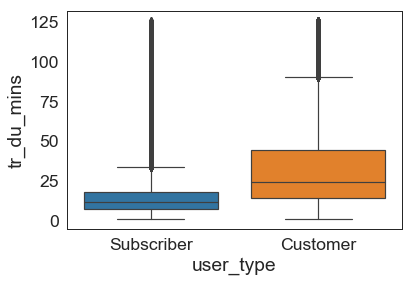

In [170]:
sns.boxplot(x='user_type', y="tr_du_mins", data=b);

In [171]:
b.shape

(186434, 29)

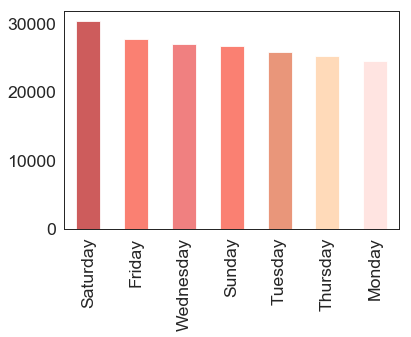

In [172]:
b["start_time"]=pd.to_datetime(b.start_time)
b["day_of_the_week"] = b["start_time"].dt.day_name()
h = b["day_of_the_week"].value_counts()

# Setting a color pallette 
my_colors = ["indianred","salmon","lightcoral","salmon","darksalmon","peachpuff","mistyrose"]*5 # <-- this concatenates the list to itself 5 times.\n",

#Display the graph
h.plot(kind = "bar", color= my_colors)
   

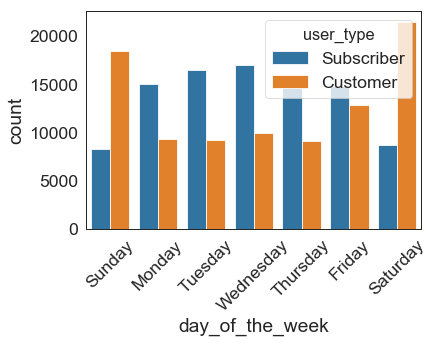

In [174]:
# Rotate the labels so you can read them

plt.xticks(rotation = 45)
sns.countplot(x="day_of_the_week",hue='user_type', data=b);

It is evident from the plot above  that  more customers rent bikes than subscribers on Saturdays and Sundays. It is safe to assume that since Subscribers use bikes more on weekdays than on weekends according to the graph, they might  be renting  bikes  to commute to office.


In [175]:
#Make new dataframe df_rides_day_hour2 to pivot our data and by day and hour, get the count of rides

b['start_time_hour'] = b['start_time'].dt.hour
b['start_time_day_name'] = b['start_time'].dt.weekday_name

df_rides_day_hour2 = pd.pivot_table(b[['start_time_day_name', 'start_time_hour', 'trip_duration']], index=['start_time_day_name', 'start_time_hour'], aggfunc='count')

#Unstack below puts days on the x-axis and hour of day on the y-axis.
df_rides_day_hour3 = df_rides_day_hour2.unstack(level=0)
df_rides_day_hour3.head(2)

trip_duration                                          \
start_time_day_name        Friday Monday Saturday Sunday Thursday Tuesday   
start_time_hour                                                             
0                             245    181      402    433      191     160   
1                             113     91      289    313      127      84   

                               
start_time_day_name Wednesday  
start_time_hour                
0                         162  
1                          77

In [176]:
#Re-index axis so day of week appears in logical progression.
df_rides_day_hour3 = df_rides_day_hour3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

#Create new axis tick labels for easy to read hours and days of the week.
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "am"
    morning_hours.append(detailed_hour)
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "pm"
    afternoon_hours.append(detailed_hour)
detailed_hours = ["12am"] + morning_hours + ["12pm"] + afternoon_hours
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']


[Text(40.5, 0.5, 'Starting time (by hour)'),
 Text(0.5, 40.5, 'Day of the Week')]

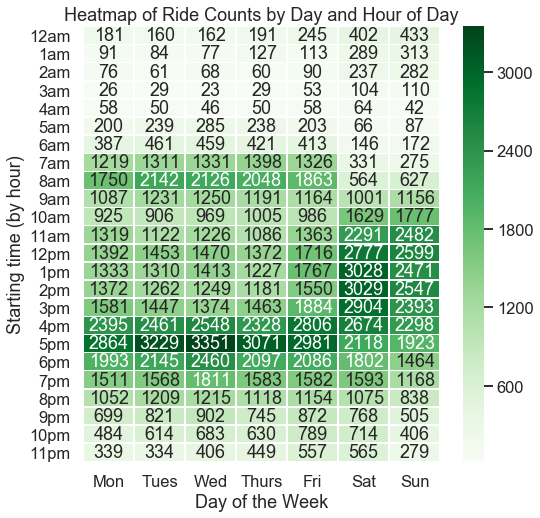

In [177]:
#Plot Heatmap of Ride Counts by Day and Hour of Day
sns.set_context("talk")
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df_rides_day_hour3, annot=True, fmt="d", cmap="Greens",linewidths=.5, ax=ax, xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Ride Counts by Day and Hour of Day", fontsize=18, y=2.01)
ax.set(xlabel='Day of the Week', ylabel='Starting time (by hour)')

Text(0.5, 1, 'Bike Rentals at Maximum Temperatures by seasons')

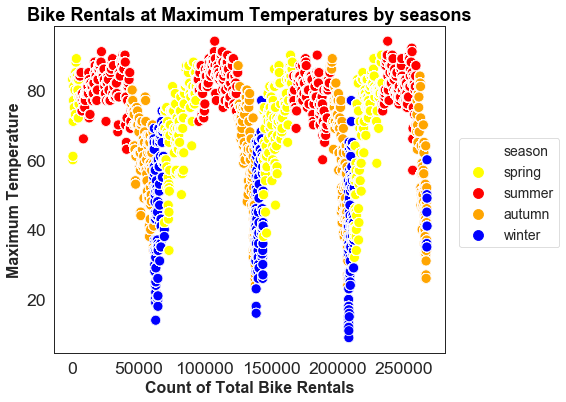

In [178]:
#The plot below depicts the seasonality of bike rentals based on temperatures:
   
plt.figure(figsize=(7,6))
fontdict={'fontsize': 18, 'weight' : 'bold', 'horizontalalignment': 'center'}
sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller
sns.set_style('white')
sns.scatterplot(y='TMAX', x='row_count', hue = 'season', data= b,  palette=['yellow','red','orange','blue'], legend='full', size='season', sizes=[100,100,100,100])
plt.legend(scatterpoints=1, bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1., ncol=1, fontsize=14)
plt.ylabel('Maximum Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Count of Total Bike Rentals', fontsize=16, fontweight='bold')
plt.title('Bike Rentals at Maximum Temperatures by seasons', fontdict=fontdict, color="black", position=(0.5,1))

The scatter plot above shows that as the temperature increases the count i.e. the number of total rentals also increases. The maximum number of rental counts seems to be when the temperature is between 60°F to 90°F. There is a clear seasonal trend where the total rental bikes seems to decrease during Winter and increase during summers.

In [179]:
b['weather'].value_counts()

3.0    183100
2.0      1959
0.0      1375
Name: weather, dtype: int64

In [180]:
# renaming values of the column\n",
b['weather'] = b['weather'].map({0: "worst", 2: "moderate:worst", 3:"good"})
b["weather"].value_counts()

good              183100
moderate:worst      1959
worst               1375
Name: weather, dtype: int64

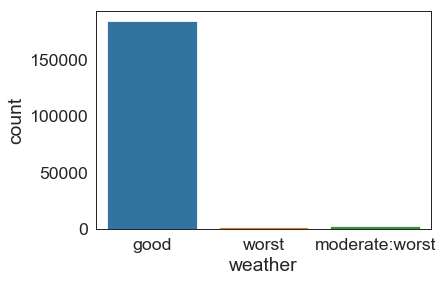

In [181]:
#plotting using seaborn  count plot\n",
sns.countplot(x='weather', data=b)

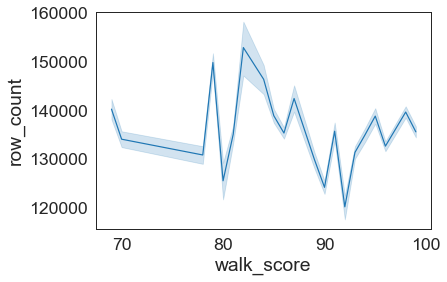

In [182]:
#plotting the walk scores vs row_count using seaborn line plot\
ax = sns.lineplot(x="walk_score", y="row_count", data= b)

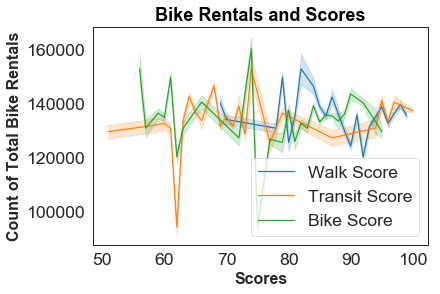

In [183]:
ax = sns.lineplot(x="walk_score", y="row_count", data=b, label = "Walk Score");
ax = sns.lineplot(x="transit_score", y="row_count", data=b, label = "Transit Score");
ax = sns.lineplot(x="bike_score", y="row_count", data=b, label ="Bike Score");
ax.legend()
plt.xlabel('Scores', fontsize=16, fontweight='bold');
plt.ylabel('Count of Total Bike Rentals', fontsize=16, fontweight='bold');
plt.title('Bike Rentals and Scores', fontdict=fontdict, color="black", position=(0.5,1));

In [184]:
b.bike_score.value_counts()

85.0    24121
87.0    23088
86.0    15543
84.0    14087
89.0    10839
82.0     9803
92.0     8638
60.0     8601
91.0     8302
83.0     6371
77.0     6109
59.0     5627
95.0     5121
80.0     4607
90.0     4321
66.0     3977
61.0     3920
63.0     3582
81.0     3031
88.0     2764
62.0     2641
72.0     2573
75.0     2489
57.0     1799
79.0     1682
74.0     1188
94.0      989
56.0      621
Name: bike_score, dtype: int64

As per website , the location with bike score between 70 - 89 is considered as very bikeable. But the graph above shows anomalies at 75 and  the bike rental counts drops drastically.   Hence I will be deleting rows containing bike score of 75, and less than or equal 61.

In [185]:
b.drop(b.index[b["bike_score"]==75 ],inplace = True)
b.drop(b.index[b["bike_score"]<=61 ],inplace = True)

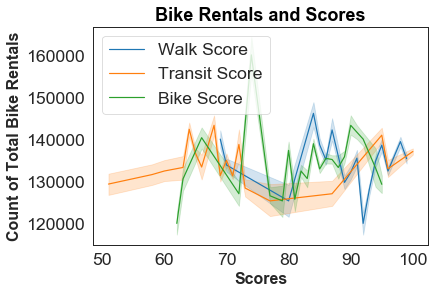

In [186]:
ax = sns.lineplot(x="walk_score", y="row_count", data=b, label = "Walk Score");
ax = sns.lineplot(x="transit_score", y="row_count", data=b, label = "Transit Score");
ax = sns.lineplot(x="bike_score", y="row_count", data=b, label ="Bike Score");
ax.legend()
plt.xlabel('Scores', fontsize=16, fontweight='bold');
plt.ylabel('Count of Total Bike Rentals', fontsize=16, fontweight='bold');
plt.title('Bike Rentals and Scores', fontdict=fontdict, color="black", position=(0.5,1));

In [187]:
b.shape

(163377, 32)

The plot above shows the relation between rental counts and score after removing anomalies. A total of 163377 will be retained for further analysis

In [188]:
df4 = b.to_csv("Pittsburgh_healthy_bikeshare.csv", index = False)